In [1]:
import pandas as pd
import numpy as np

# importando as bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# configurando o estilo padrão dos gráficos
sns.set_theme(style="whitegrid")

# URL direta para o arquivo de dados da covid
url = 'https://data.brasil.io/dataset/covid19/caso_full.csv.gz'

print("Iniciando o download e carregamento dos dados...")
print("Isso pode levar alguns minutos...")

# adicionando o parâmetro 'parse_dates=['date']'
# ensinando pandas a ler a coluna 'date' já como um tipo de data,
# e não como um texto 
# essa transformação é mais importante.
df_covid = pd.read_csv(url, 
                       compression='gzip', 
                       parse_dates=['date'], 
                       low_memory=False)

print("\nDados carregados e coluna 'date' transformada!")
display(df_covid.head())

Iniciando o download e carregamento dos dados...
Isso pode levar alguns minutos...

Dados carregados e coluna 'date' transformada!


,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


In [2]:
print("--- Informações Gerais (Após carregar) ---")
# verificando como a coluna 'date' agora é do tipo 'datetime64[ns]'
df_covid.info(verbose=True, show_counts=True)

print("\n\n--- Contagem de Valores Nulos por Coluna ---")
# há muitos nulos em 'city' e 'city_ibge_code'
print(df_covid.isnull().sum())

--- Informações Gerais (Após carregar) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853648 entries, 0 to 3853647
Data columns (total 18 columns):
 #   Column                                         Non-Null Count    Dtype         
---  ------                                         --------------    -----         
 0   city                                           3833529 non-null  object        
 1   city_ibge_code                                 3840002 non-null  float64       
 2   date                                           3853648 non-null  datetime64[ns]
 3   epidemiological_week                           3853648 non-null  int64         
 4   estimated_population                           3840002 non-null  float64       
 5   estimated_population_2019                      3840002 non-null  float64       
 6   is_last                                        3853648 non-null  bool          
 7   is_repeated                                    3853648 non-null  bool     

Processamento: Limpeza e Filtragem dos Dados

O .isnull().sum() mostrou que há muitos nulos nas colunas city` e city_ibge_code.

Isso acontece porque o dataset tem dois tipos de dados misturados:
- place_type == 'city' (registros de cidades)
- place_type == 'state' (registros consolidados do estado)

Quando place_type é 'state', a coluna city fica nula (NaN). Isso não é um erro, é o design do dataset.

Para fazer uma análise limpa e responder perguntas de alto nível (como o total por estado ou a curva nacional), a melhor estratégia de "limpeza" é filtrar o DataFrame para usar apenas os registros de nível estadual.

In [3]:
print(f"Formato original (linhas, colunas): {df_covid.shape}")

# criando um novo DataFrame 'df_estados' contendo apenas as linhas onde place_type é 'state'
df_estados = df_covid[df_covid['place_type'] == 'state'].copy()

print(f"Formato após filtrar por estados (linhas, colunas): {df_estados.shape}")

print("\n--- Verificação de Nulos (Após Filtrar por Estados) ---")
# a maioria dos nulos desapareceu
print(df_estados.isnull().sum().sort_values(ascending=False))

Formato original (linhas, colunas): (3853648, 18)
Formato após filtrar por estados (linhas, colunas): (20119, 18)

--- Verificação de Nulos (Após Filtrar por Estados) ---
city                                             20119
last_available_confirmed_per_100k_inhabitants        6
city_ibge_code                                       0
date                                                 0
estimated_population                                 0
epidemiological_week                                 0
estimated_population_2019                            0
is_last                                              0
is_repeated                                          0
last_available_confirmed                             0
last_available_date                                  0
last_available_death_rate                            0
last_available_deaths                                0
order_for_place                                      0
place_type                                           0
stat

In [4]:
# definindo a coluna 'date' como o novo índice do DataFrame
df_estados.set_index('date', inplace=True)

# ordenando o índice por data, o que é essencial para gráficos de linha
df_estados.sort_index(inplace=True)

print("DataFrame com índice de data (pronto para análise temporal):")
display(df_estados.head())

DataFrame com índice de data (pronto para análise temporal):


,city,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
date,,,,,,,,,,,,,,,,,
2020-02-25,NaN,35.0,202009,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0,0,1,state,SP,1,0
2020-02-26,NaN,35.0,202009,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0,0,2,state,SP,0,0
2020-02-27,NaN,35.0,202009,46289333.0,45919049.0,False,False,1,0.00216,2020-02-27,0.0,0,3,state,SP,0,0
2020-02-28,NaN,35.0,202009,46289333.0,45919049.0,False,False,2,0.00432,2020-02-28,0.0,0,4,state,SP,1,0
2020-02-29,NaN,35.0,202009,46289333.0,45919049.0,False,False,2,0.00432,2020-02-29,0.0,0,5,state,SP,0,0


In [5]:
print("--- Resumo Estatístico (Variáveis Numéricas) ---")
# selecionando apenas colunas numéricas
display(df_estados.describe())

--- Resumo Estatístico (Variáveis Numéricas) ---


,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,20119.000000,20119.000000,2.011900e+04,2.011900e+04,2.011900e+04,20113.000000,20119.000000,20119.000000,20119.000000,20119.000000,20119.000000
mean,29.153686,202098.210299,7.894739e+06,7.834804e+06,4.667465e+05,7011.094249,0.026305,12504.559769,373.097420,1483.659228,32.763010
std,12.766146,60.217885,9.211902e+06,9.146911e+06,6.917267e+05,5536.927047,0.014806,21809.547917,215.151478,3011.849286,73.942614
min,11.000000,202009.000000,6.311810e+05,6.057610e+05,0.000000e+00,0.002160,0.000000,0.000000,1.000000,-12028.000000,-84.000000
25%,17.000000,202038.000000,2.809394e+06,2.778986e+06,8.589500e+04,2360.895980,0.019500,1845.000000,187.000000,175.000000,3.000000
50%,27.000000,202111.000000,4.064052e+06,4.018650e+06,2.445610e+05,6199.525730,0.023400,6042.000000,373.000000,596.000000,11.000000
75%,41.000000,202138.000000,9.616621e+06,9.557071e+06,5.401220e+05,10682.989510,0.028100,13509.500000,559.000000,1506.000000,30.000000
max,53.000000,202213.000000,4.628933e+07,4.591905e+07,5.232374e+06,25521.031720,0.222200,167110.000000,762.000000,105200.000000,1389.000000


In [6]:
# para ver a curva nacional, precisamos somar os dados de todos os estados por dia.
# o .groupby('date') agrupa todas as linhas que têm o mesmo índice (a mesma data).
# .sum() soma os valores de 'new_confirmed' e 'new_deaths' de todos os estados para aquele dia.
df_brasil = df_estados.groupby('date')[['new_confirmed', 'new_deaths']].sum()

display(df_brasil.head())

,new_confirmed,new_deaths
date,,
2020-02-25,1,0
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,1,0
2020-02-29,0,0


--- Gráfico de Linha: Novos Casos Diários no Brasil ---


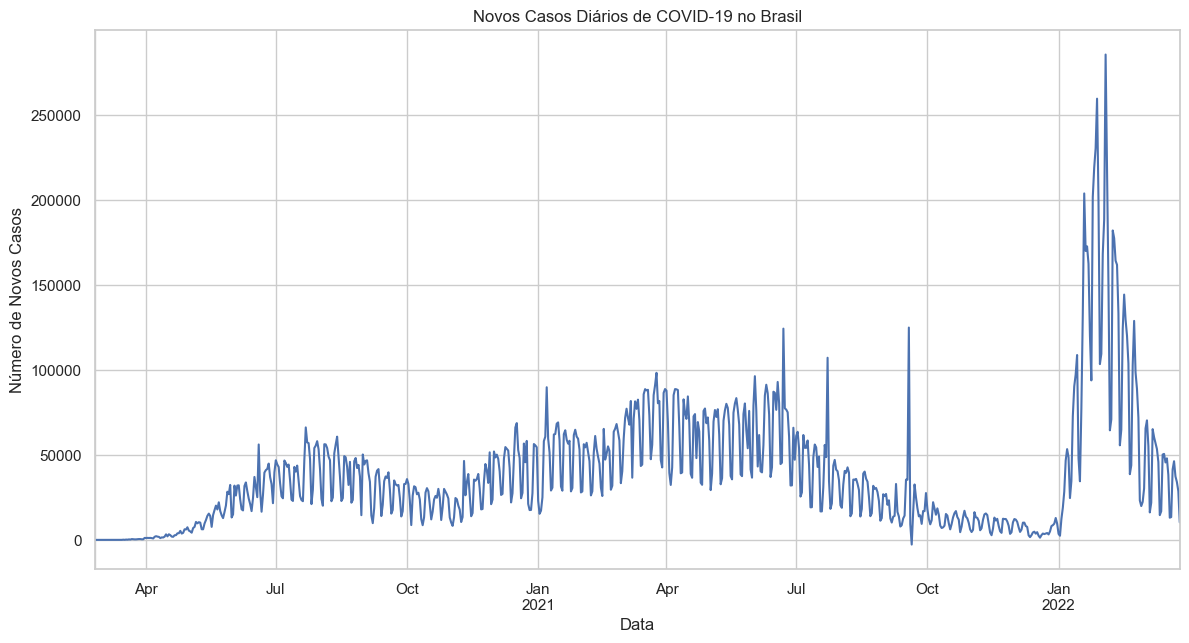


--- Gráfico de Linha: Média Móvel de 7 Dias (Novos Casos) ---


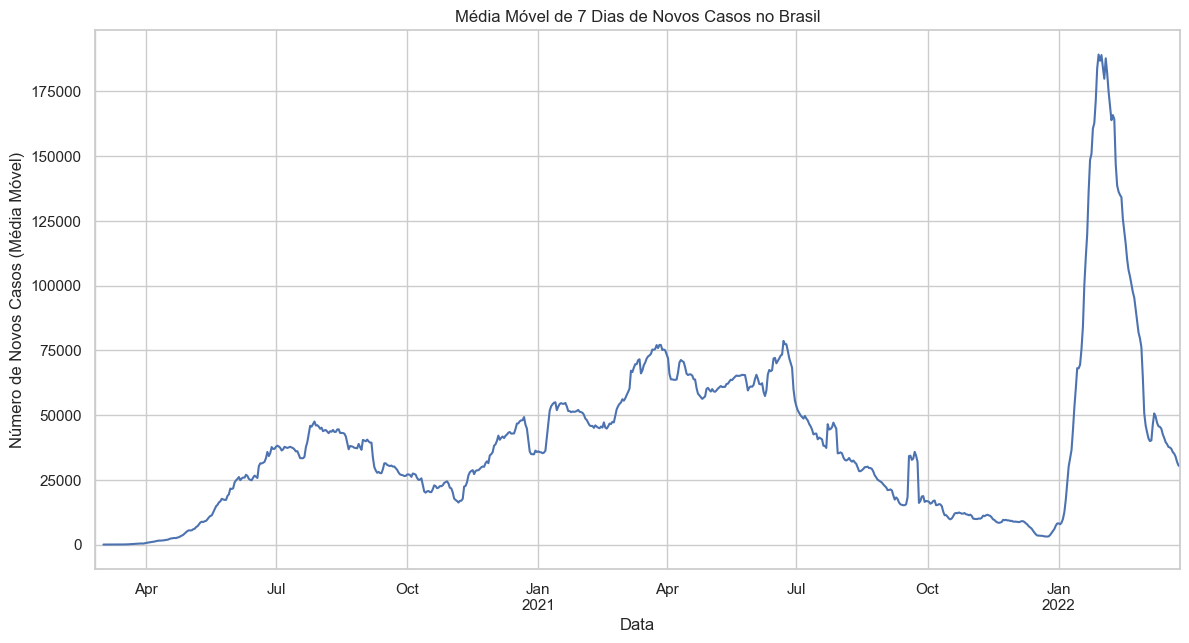

In [7]:
print("--- Gráfico de Linha: Novos Casos Diários no Brasil ---")

plt.figure(figsize=(14, 7))
df_brasil['new_confirmed'].plot(title='Novos Casos Diários de COVID-19 no Brasil')
plt.ylabel('Número de Novos Casos')
plt.xlabel('Data')
plt.show()

# média móvel de 7 dias.
print("\n--- Gráfico de Linha: Média Móvel de 7 Dias (Novos Casos) ---")
plt.figure(figsize=(14, 7))
df_brasil['new_confirmed'].rolling(window=7).mean().plot(title='Média Móvel de 7 Dias de Novos Casos no Brasil')
plt.ylabel('Número de Novos Casos (Média Móvel)')
plt.xlabel('Data')
plt.show()

--- Gráfico de Linha: Média Móvel de 7 Dias (Novas Mortes) ---


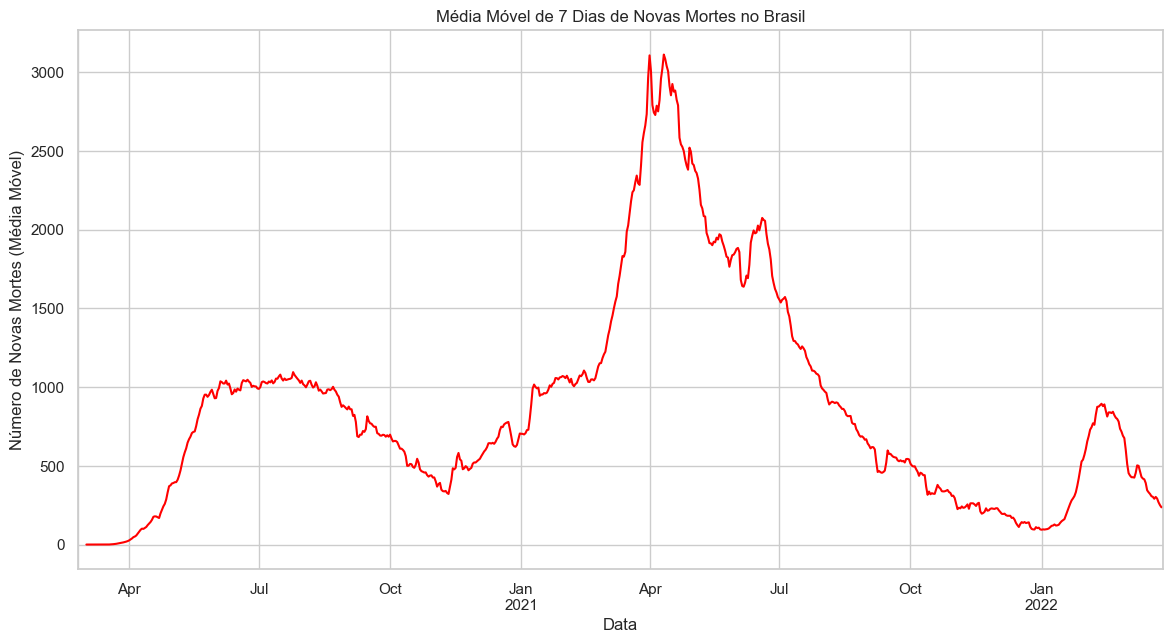

In [8]:
print("--- Gráfico de Linha: Média Móvel de 7 Dias (Novas Mortes) ---")

plt.figure(figsize=(14, 7))
df_brasil['new_deaths'].rolling(window=7).mean().plot(title='Média Móvel de 7 Dias de Novas Mortes no Brasil', color='red')
plt.ylabel('Número de Novas Mortes (Média Móvel)')
plt.xlabel('Data')
plt.show()

--- Matriz de Correlação (Heatmap) - Nível Brasil ---


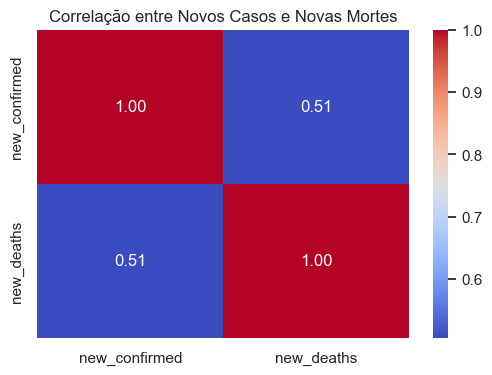

In [9]:
print("--- Matriz de Correlação (Heatmap) - Nível Brasil ---")
# verificando a correlação entre novos casos e novas mortes no DataFrame 'df_brasil'
corr_matrix_brasil = df_brasil.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix_brasil, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Novos Casos e Novas Mortes')
plt.show()

--- Gráfico de Barras: Total de Casos Acumulados por Estado ---


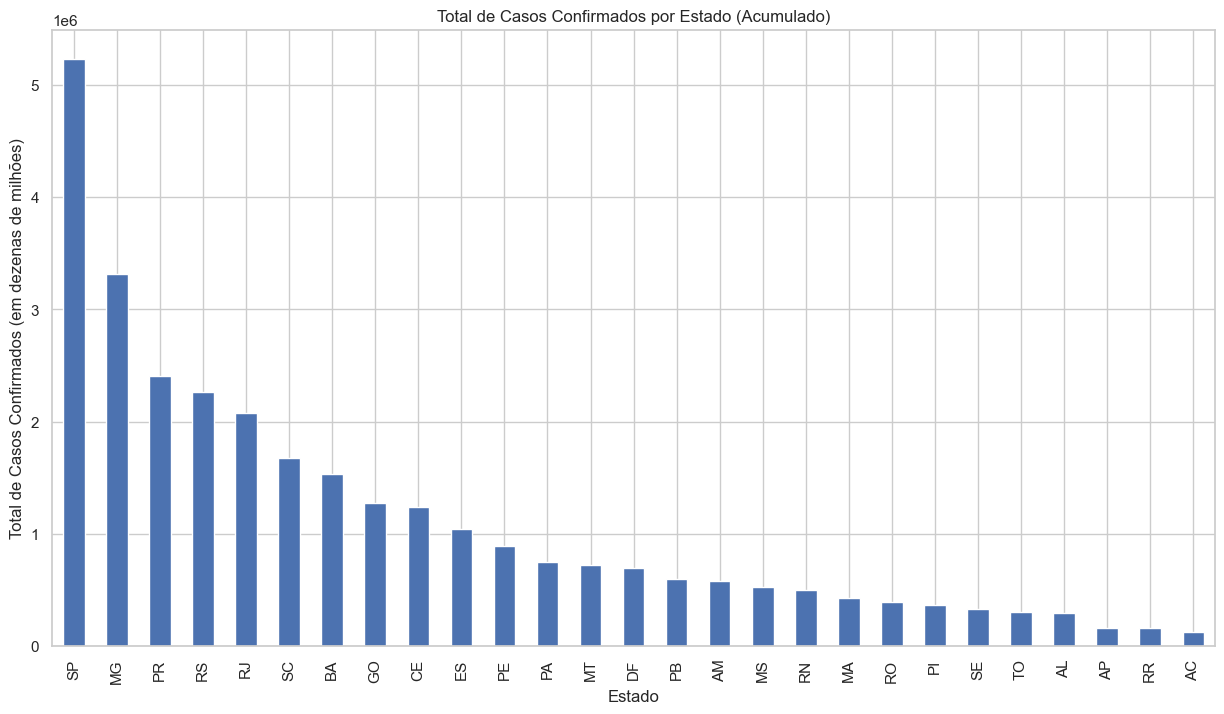

In [10]:
print("--- Gráfico de Barras: Total de Casos Acumulados por Estado ---")

# agrupando por estado e pegamos o valor MÁXIMO da coluna 'last_available_confirmed'
total_por_estado = df_estados.groupby('state')['last_available_confirmed'].max().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
total_por_estado.plot(kind='bar', title='Total de Casos Confirmados por Estado (Acumulado)')
plt.ylabel('Total de Casos Confirmados (em dezenas de milhões)')
plt.xlabel('Estado')
plt.show()

--- Gráfico de Barras: Total de Mortes Acumuladas por Estado ---


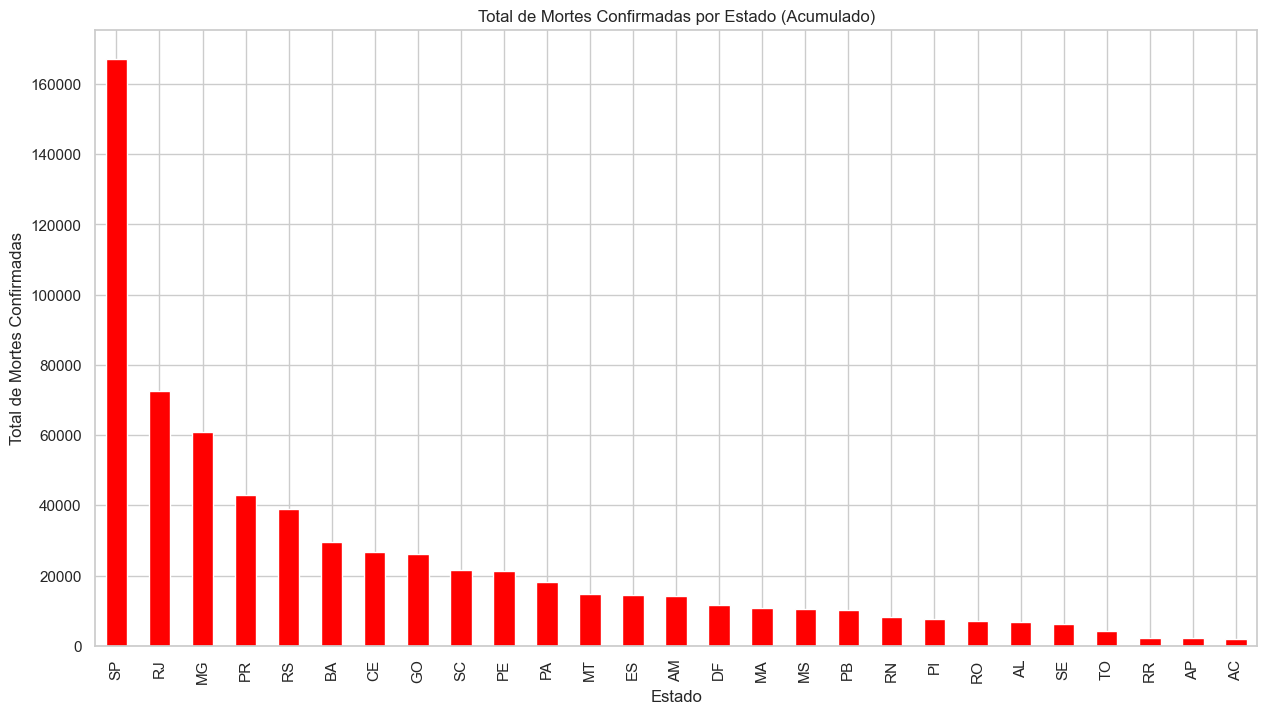

In [11]:
print("--- Gráfico de Barras: Total de Mortes Acumuladas por Estado ---")

# pegando o valor MÁXIMO de mortes acumuladas
total_mortes_estado = df_estados.groupby('state')['last_available_deaths'].max().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
total_mortes_estado.plot(kind='bar', color='red', title='Total de Mortes Confirmadas por Estado (Acumulado)')
plt.ylabel('Total de Mortes Confirmadas')
plt.xlabel('Estado')
plt.show()

Qual estado brasileiro registrou o maior número acumulado de casos de COVID-19?
        
Conforme o gráfico de barras "Total de Casos Confirmados por Estado", o estado de São Paulo (SP) foi o que registrou o maior número de casos acumulados, ficando bem à frente do segundo colocado, Minas Gerais (MG).

Observando a curva nacional, qual foi o período aproximado do pico de novas mortes por COVID-19 no Brasil?
        
O gráfico de "Média Móvel de 7 Dias de Novas Mortes" (Célula 15) mostra que o pico mais agudo e letal da pandemia ocorreu no primeiro semestre de 2021, atingindo o seu máximo por volta de abril de 2021. Houve outros picos, como no início de 2022, mas nenhum se compara em magnitude ao de 2021.